In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
sns.set(font="IPAexGothic")

%load_ext autoreload
%autoreload 2

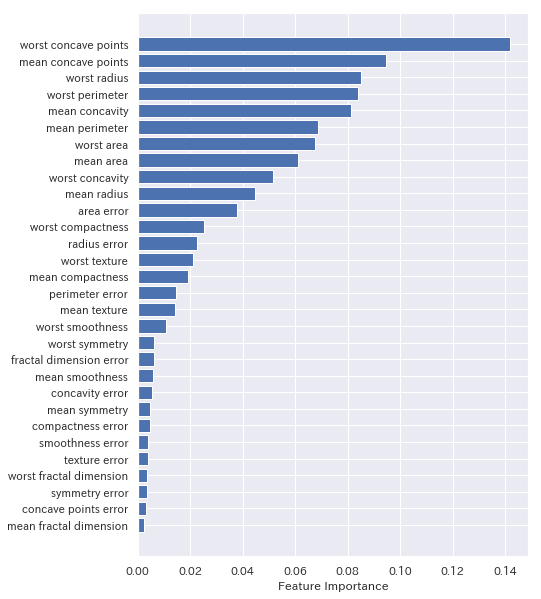

In [19]:
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X, y)

imp_df = pd.DataFrame()
imp_df["feature"] = X.columns
imp_df["importance"] = clf.feature_importances_
imp_df = imp_df.sort_values("importance")

plt.figure(figsize=(7, 10))
plt.barh(imp_df.feature, imp_df.importance )
plt.xlabel("Feature Importance")
plt.show()

In [21]:
X.shape, y.shape

((569, 30), (569,))

In [20]:
def get_feature_importances(X, y, shuffle=False):
    if shuffle:
        y = np.random.permutation(y)
        
    clf = RandomForestClassifier(n_estimator=50, random_state=42)
    clf.fit(X,  y)
    
    imp_df = pd.DataFrame()